## Case Study 
The Framingham Heart Study is a long term prospective study of the etiology of cardiovascular disease among a population of free living subjects in the community of Framingham, Massachusetts. The Framingham Heart Study was a landmark study in epidemiology in that it was the first prospective study of cardiovascular disease and identified the concept of risk factors and their joint effects FHS Longitudinal Data Document.####  Dataset Details

The dataset is a rather small subset of possible FHS dataset, having 4240 observations and 16 variables. The variables are as follows#### dataset columns disciption:

sex : the gender of the observations. The variable is a binary named “male” in the dataset.
age : Age at the time of medical examination in years.
education : A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
currentSmoker: Current cigarette smoking at the time of examinations
cigsPerDay: Number of cigarettes smoked each day
BPmeds: Use of Anti-hypertensive medication at exam
prevalentStroke: Prevalent Stroke (0 = free of disease)
prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated
diabetes: Diabetic according to criteria of first exam treated
totChol: Total cholesterol (mg/dL)
sysBP: Systolic Blood Pressure (mmHg)
diaBP: Diastolic blood pressure (mmHg)
BMI: Body Mass Index, weight (kg)/height (m)^2
heartRate: Heart rate (beats/minute)
glucose: Blood glucose level (mg/dL)
And finally the response variable : + TenYearCHD : The 10 year risk of coronary he#### art disease(CHD).

Questionnaire :

What is the spread of each attribute in the given data set ?

Can we get the count of CHD w.r.t to Gender ?

Can we group people of certain age together and figure out how Sys. BP and Dia. BP affects by Age group ?

How is our Target variable distr#### ibuted ? is it Imbalanced ?

Objective :

The goal is to make some predictive models on a FHS dataset, and reviewing some exploratory and modelling techiniques.

### Import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [2]:
df = pd.read_csv(r'C:\Users\jagan\Documents\ML\datasets\5. heart disease prediction\framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# shape of the dataset

print(f"No of Records : {df.shape[0]} \n No of Features : {df.shape[1]}")

No of Records : 4240 
 No of Features : 16


In [4]:
# lets describe the dataset

df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
# lets check column data types by using info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


**## Observation results:**

- we have 7 columns are int type.
- another 9 columns we have float data type.

In [6]:
# lets check with data cleaning and EDA( Exploratory data analysis) process

df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# percentage of the null values

(df.isna().sum() / df.shape[0]) * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

### ***Observation results****

- #### In education (105) = 2.47% of null values
- #### cigsPerDay (29) = 0.68% of null values
- #### BPMeds(53) = 1.25% of null values
- #### totChol(50) = 1.17% of null values
- #### BMI (19) = 0.44% of null values
- #### hearRate(1) = 0.02% of null values
- #### glucose (388) = 9.15% of null values

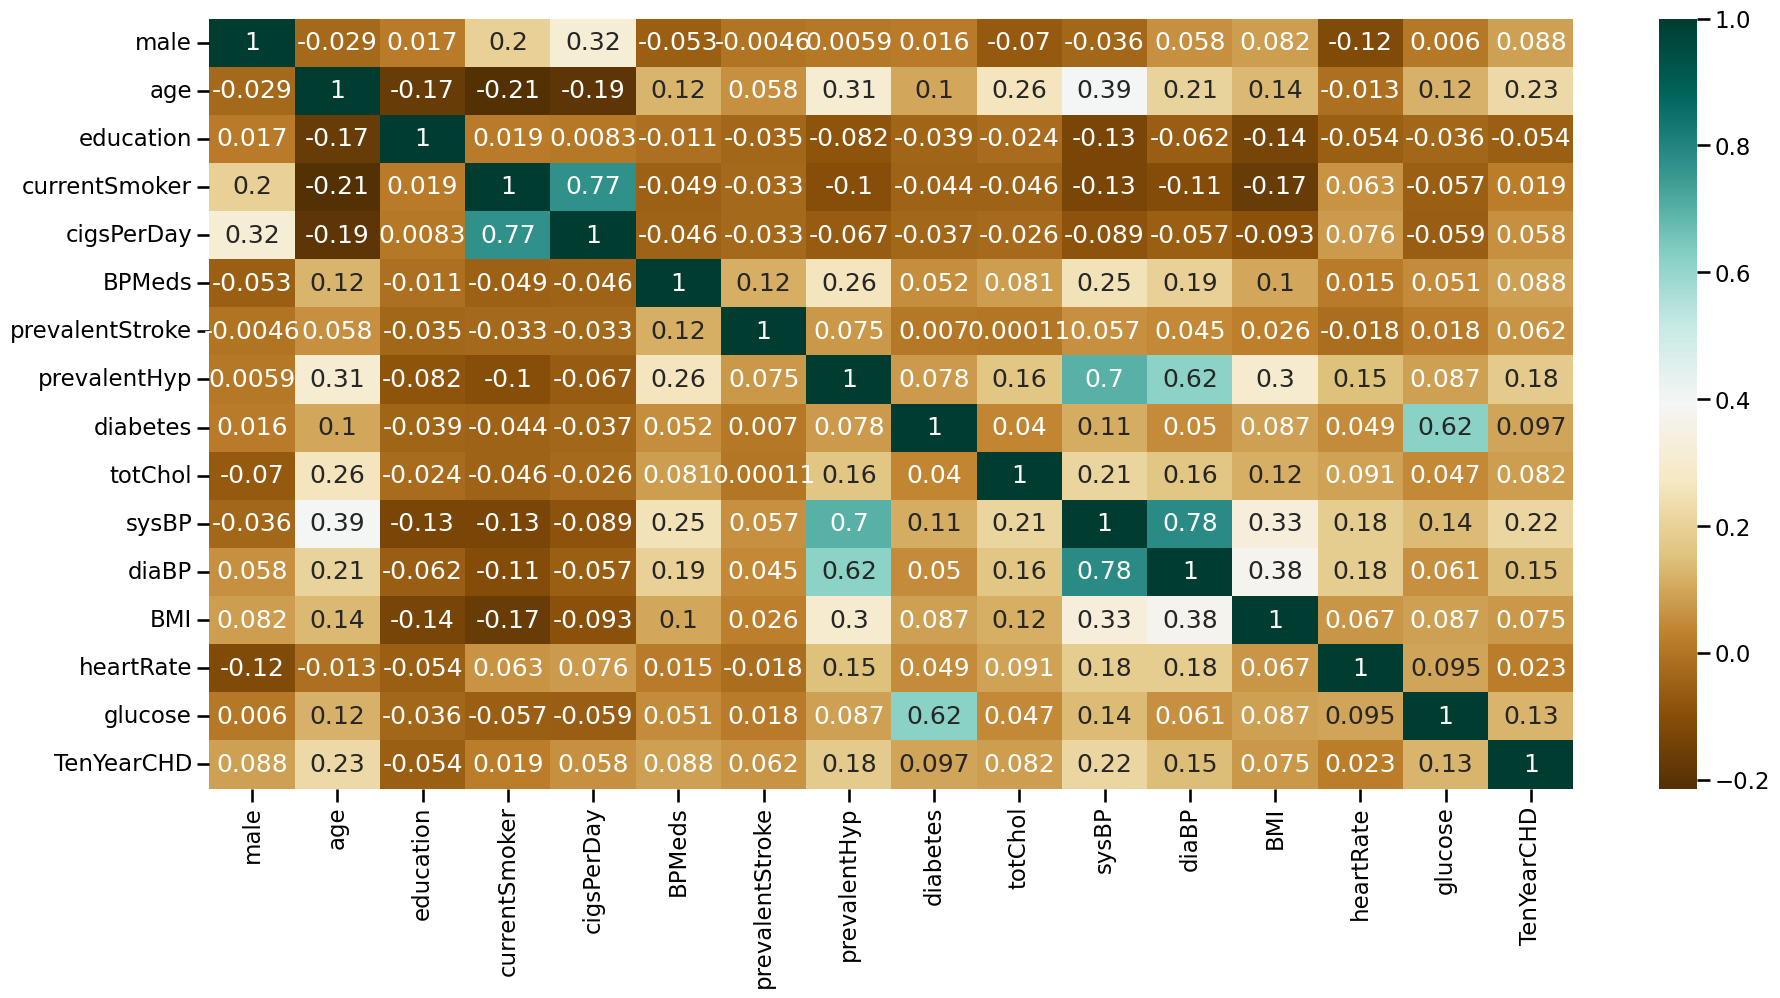

In [8]:
# Pearson correlation

sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(), annot = True, cmap= 'BrBG')
plt.show()

### Observations
correlation will give to us relation with in attributes.we need always keep 1 feature from 2 strongly correlated once. since we want to perform EDA so we have to keep them and remove them before modeling
- #### currentSmoker and cigsPerDay are highly positively correlated 77 (scalled for better observations)
- #### prevalentHyp vs sysBP / diaBP are having postive correlation 70 and 62
- #### glucose and diabates are positively correlated
- #### sysBP / diaBP are also having postive correlation


#### since we have postive correlations in currentsmoker and cigsPerDay
#### wkt currentsmoker have 0 means (not affected) and 1 means (affected)
#### we can groupby the currentSmoker and impute the missing values based on median.
#### we can also do same for BMI based on male (gender) and Age

In [9]:
# user defined function for missing values for imputation

def impute_median(data):
    return data.fillna(data.median())

In [10]:
# median imputation

df.glucose = df['glucose'].transform(impute_median)
df.education = df['education'].transform(impute_median)
df.heartRate = df['heartRate'].transform(impute_median)
df.totChol = df['totChol'].transform(impute_median)
df.BPMeds = df['BPMeds'].transform(impute_median)

In [11]:
# group by the class that are relation in other classes

by_currentSmoker = df.groupby(['currentSmoker'])
df.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(impute_median)

by_age = df.groupby(['male', 'age'])
df.BMI = by_age['BMI'].transform(impute_median)

In [12]:
# rechecking if we miss any null values

df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### EDA

- #### In this section we will explore the univarite , bivarite and multivarite
- #### we will observe the descriptive statistics which will give to us idea about spread values distribution
- #### visualizing the target attribute, if our dataset is imbalanced or not

In [13]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798756,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.072774,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.397500,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


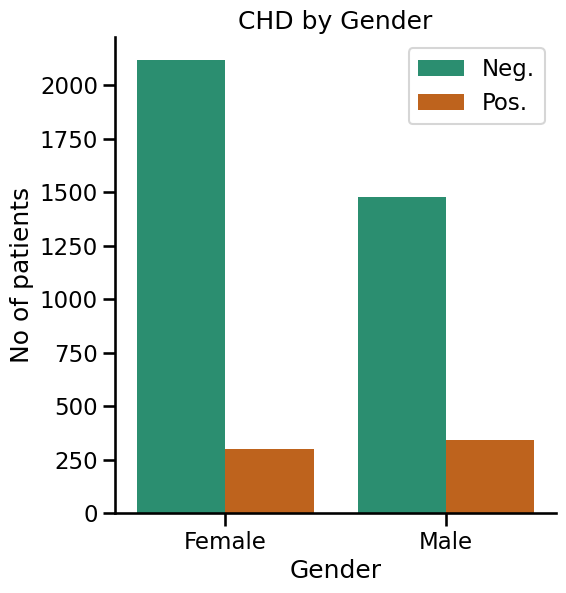

In [14]:
# visualizing the CHD of the (Gender) feature

sns.catplot(x = 'male', hue =  'TenYearCHD', data = df, kind = 'count', palette = 'Dark2',height = 6, legend = False)
plt.xlabel('Gender')
plt.xticks(ticks = [0,1], labels = ['Female', 'Male'])
plt.ylabel('No of patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('CHD by Gender')
plt.show()

### **observations*

- #### above plot it shows bivarite analysis gender wise and presence of CHD
- Negative's
- #### Approx max 80-90% females are falling negative category while approx 60-70% males are falling negative category
- Positive's
- #### while 10% of female and males are falling positive categories
- ### this is the reason we have imbalanced dataset. becoz the 80-90 % of the females are falling negative categories
  

C:\Users\jagan\AppData\Local\Temp\ipykernel_34624\1246530637.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['glucose'], color = 'orange')
C:\Users\jagan\AppData\Local\Temp\ipykernel_34624\1246530637.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['totChol'], color = 'green')
C:\U

Text(0.5, 1.0, 'Distributiuon of heartRate')

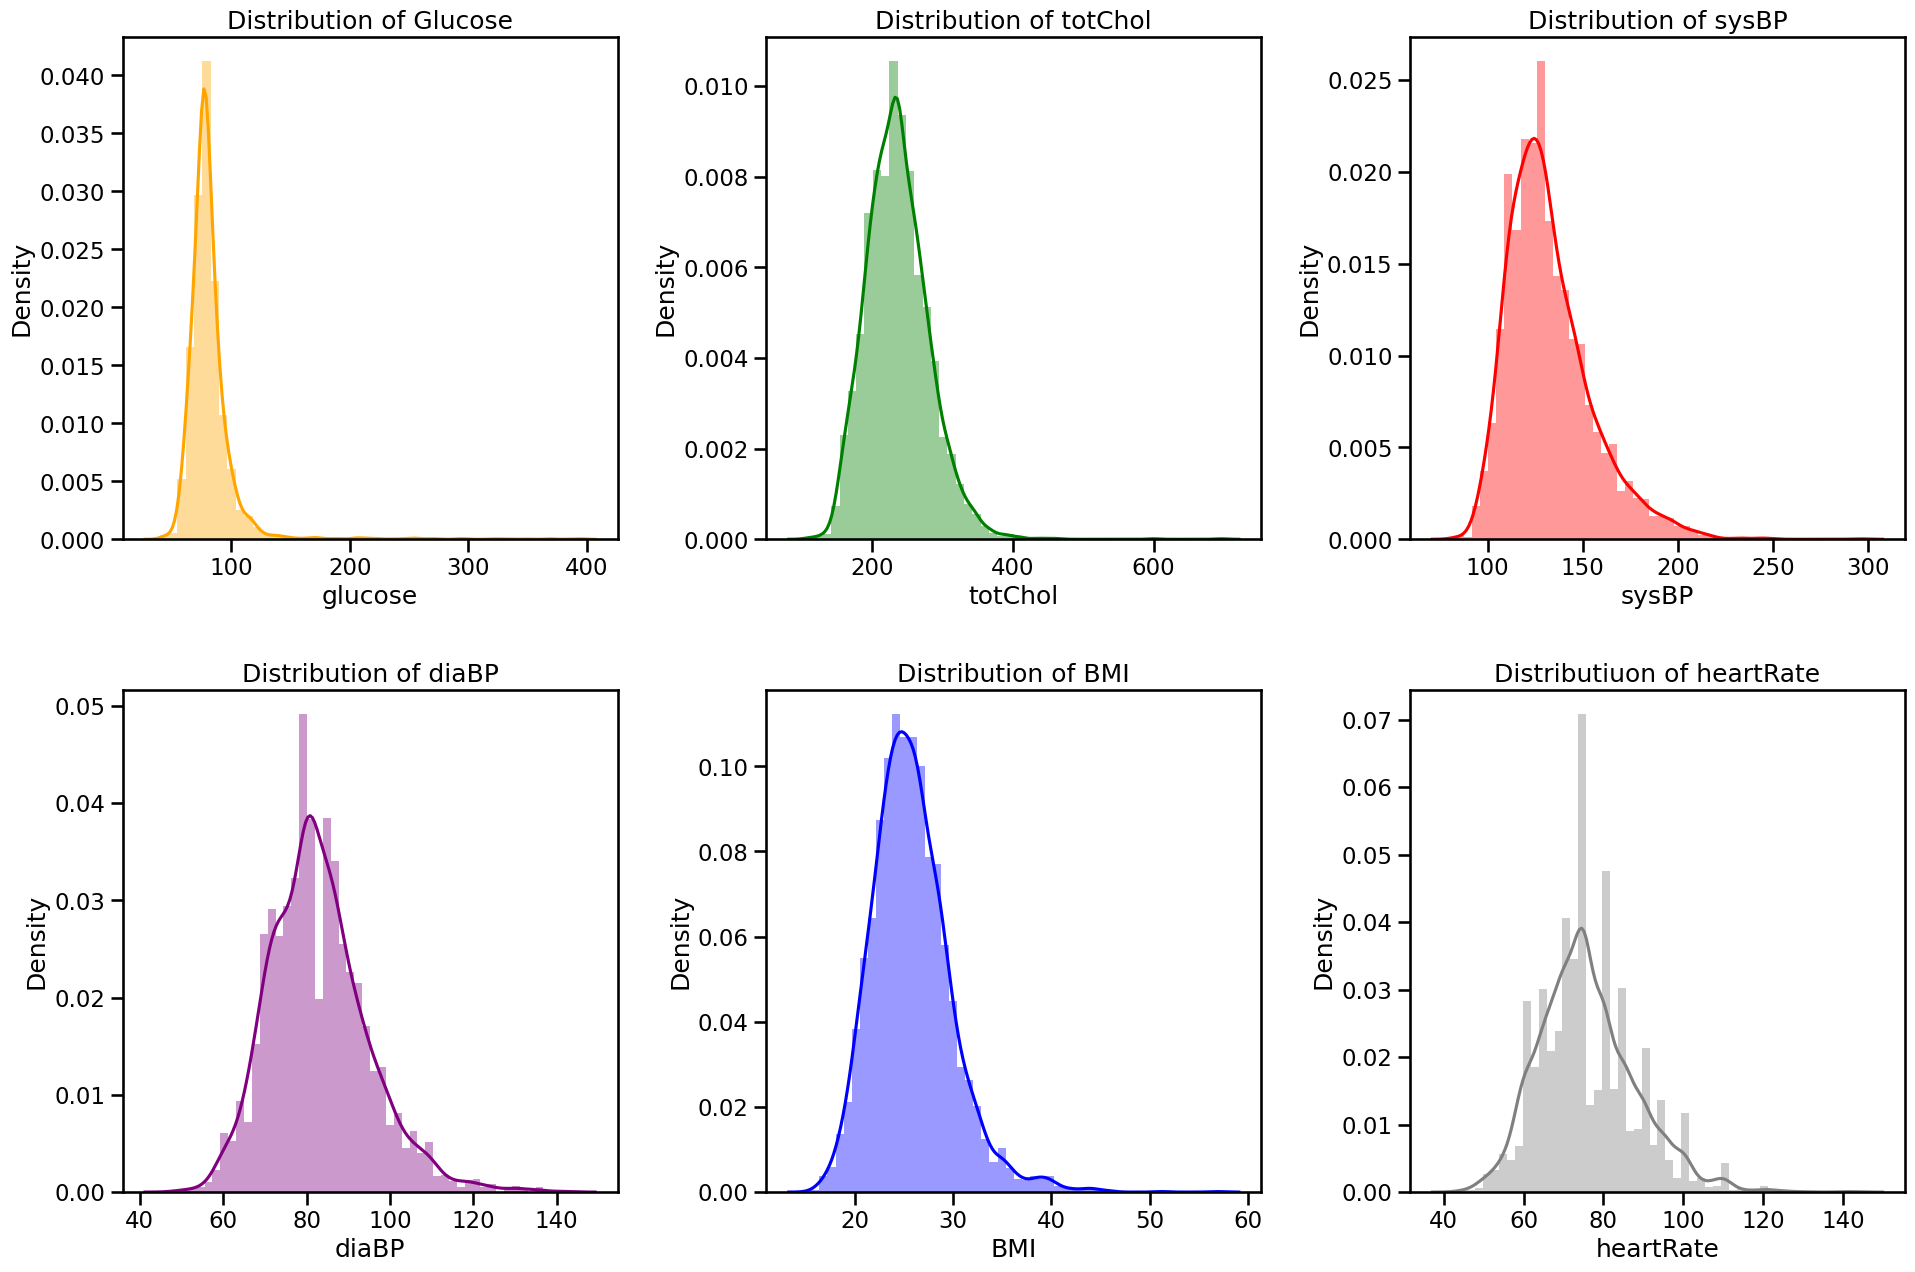

In [15]:
# distribution of the continous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

plt.subplot(2,3,1)
sns.distplot(df['glucose'], color = 'orange')
plt.title('Distribution of Glucose')

plt.subplot(2,3,2)
sns.distplot(df['totChol'], color = 'green')
plt.title('Distribution of totChol')

plt.subplot(2,3,3)
sns.distplot(df['sysBP'], color = 'red')
plt.title('Distribution of sysBP')

plt.subplot(2,3,4)
sns.distplot(df['diaBP'], color = 'purple')
plt.title('Distribution of diaBP')

plt.subplot(2,3,5)
sns.distplot(df['BMI'], color = 'blue')
plt.title('Distribution of BMI')

plt.subplot(2,3,6)
sns.distplot(df['heartRate'], color = 'grey')
plt.title('Distributiuon of heartRate')


C:\Users\jagan\AppData\Local\Temp\ipykernel_34624\2341938974.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], color = 'maroon', kde = True, bins=15 )


Text(0.5, 1.0, 'Age wised distributions of the patients')

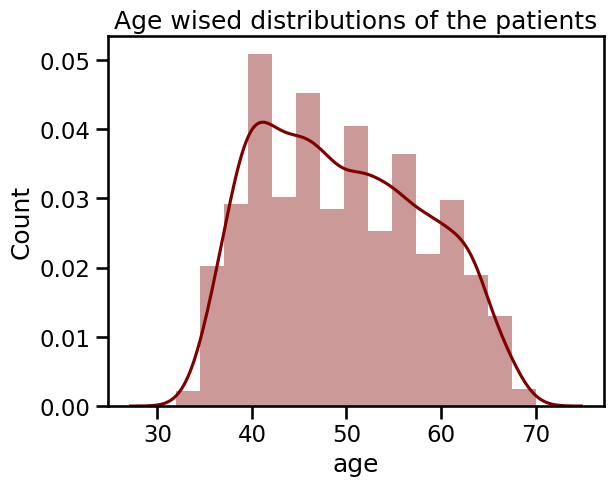

In [16]:
# age wise distributions of the patients

sns.distplot(df['age'], color = 'maroon', kde = True, bins=15 )
plt.ylabel('Count')
plt.title('Age wised distributions of the patients')

In [17]:
# user defined function

# Age encoding
def encode_age(data):
    if data<=40:
        return 0
    elif data>40 and data<=55:
        return 1
    else:
        return 2

# HeartRate encoding
def encode_heartrate(data):
    if data<=60:
        return 0
    elif data > 60 and data<=100:
        return 1
    else:
        return 2


# applying the functions

df['enc_hr'] = df['heartRate'].apply(encode_heartrate)
df['enc_age'] = df['age'].apply(lambda x : encode_age(x))
    

Text(0.5, 1.0, 'Count by Age Group')

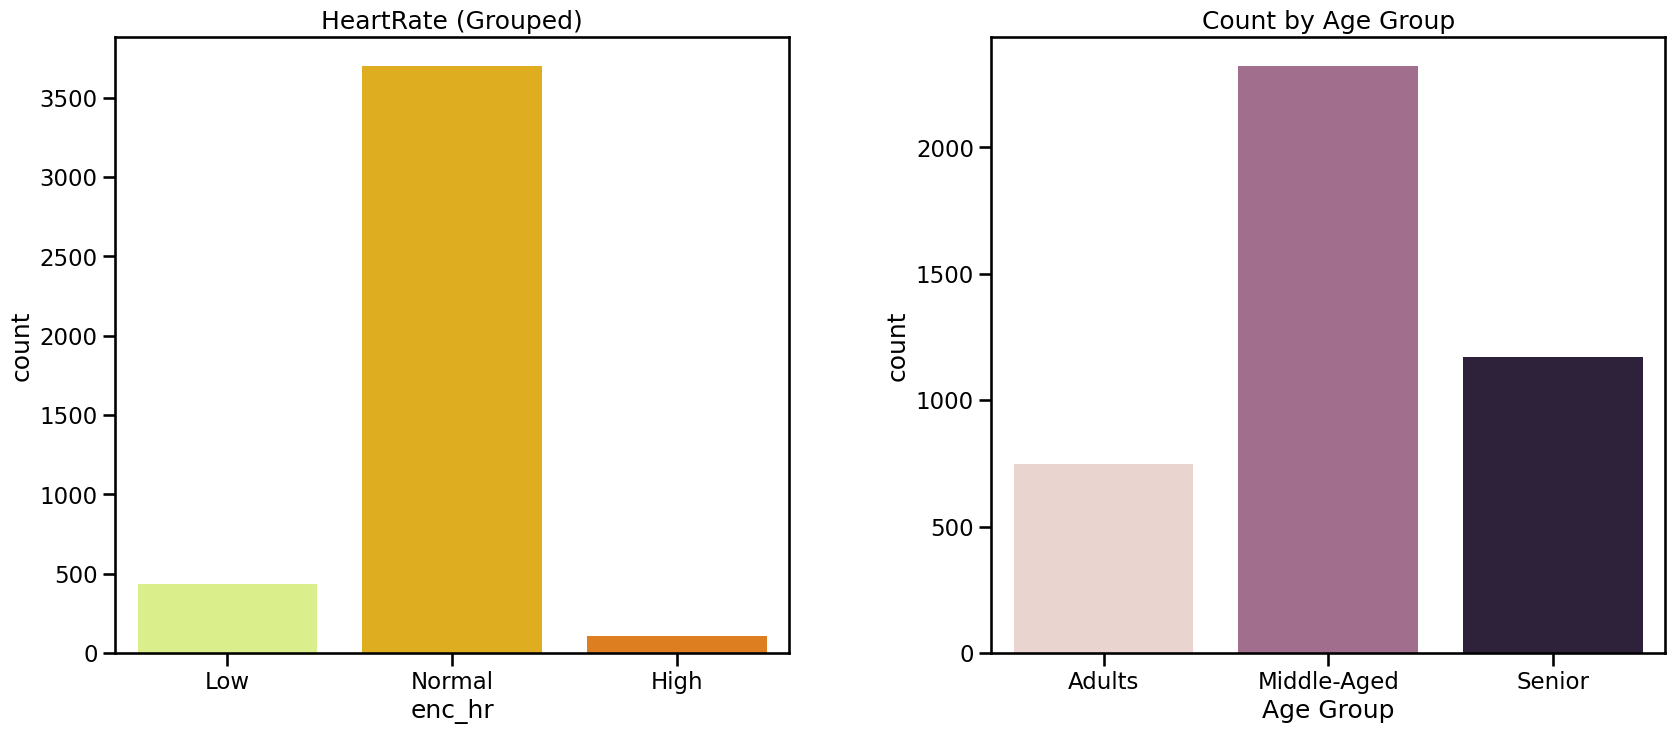

In [18]:
# HeartRate (grouped) count

plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
sns.countplot(x = 'enc_hr',data = df, hue = 'enc_hr', palette = 'Wistia', legend = False)
plt.title('HeartRate (Grouped)')
plt.xticks([0,1,2], ['Low', 'Normal', 'High'])

plt.subplot(1, 2, 2)
sns.countplot(x = 'enc_age', data = df, hue = 'enc_age', legend = False)
plt.xlabel('Age Group')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Count by Age Group')

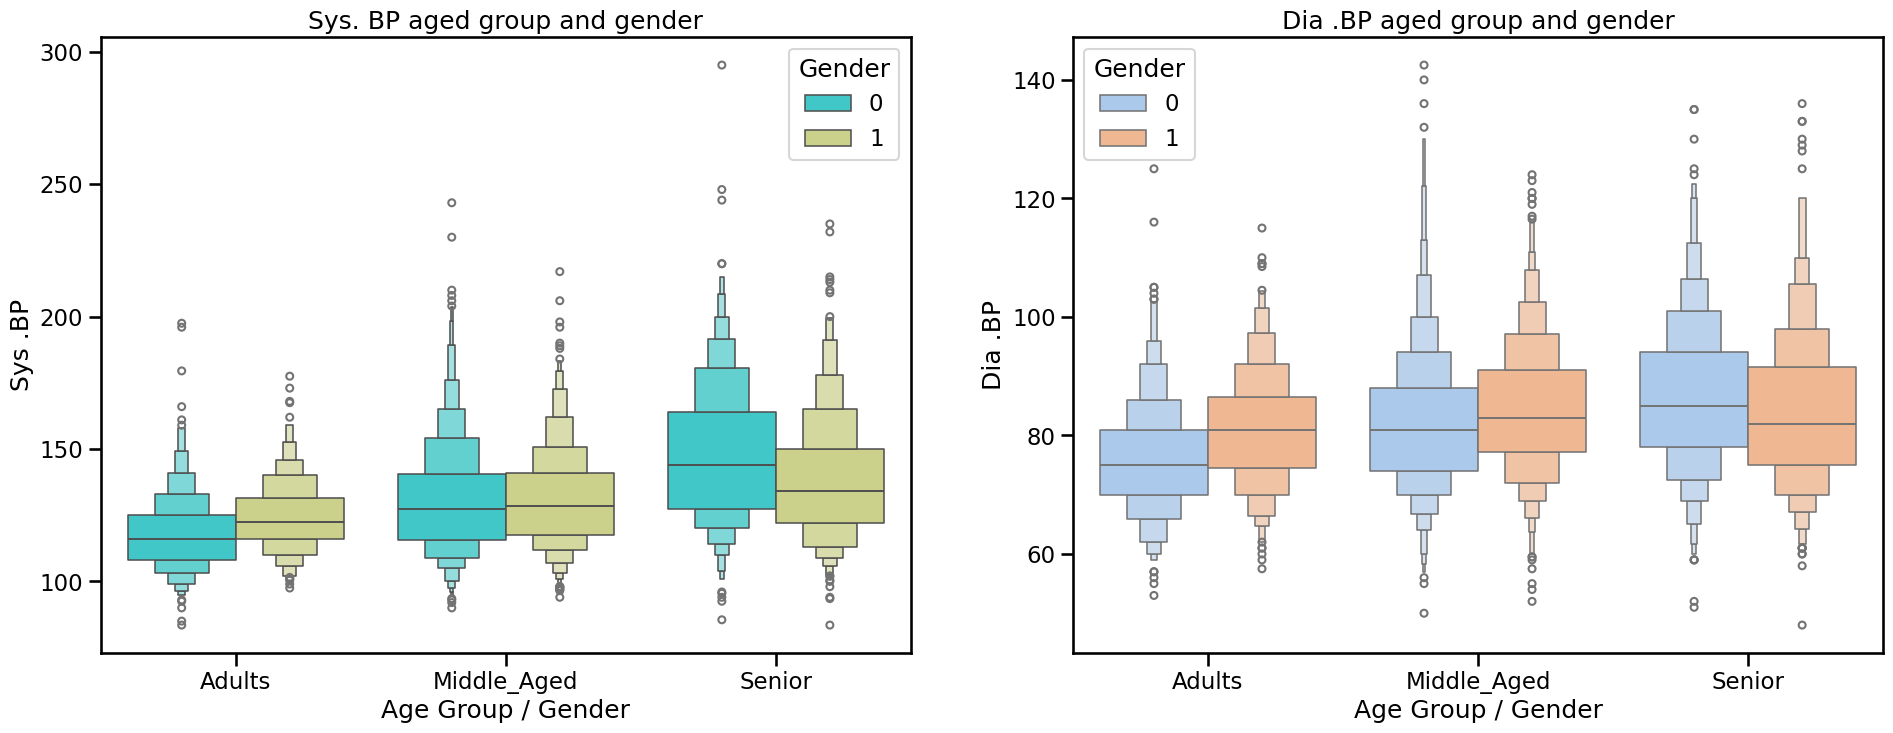

In [19]:
# multivarite analysis pt.2

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)

plt.subplot(1,2,1)
sns.boxenplot(x = 'enc_age', y = 'sysBP' ,data = df, hue = 'male', palette = 'rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys .BP')
plt.xticks(ticks = [0,1,2],labels = ['Adults', 'Middle_Aged', 'Senior'])
plt.title('Sys. BP aged group and gender')
plt.legend(title='Gender')

plt.subplot(1,2,2)
sns.boxenplot(x = 'enc_age', y = 'diaBP', data = df, hue = 'male', palette = 'pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia .BP')
plt.xticks(ticks = [0,1,2], labels = ['Adults', 'Middle_Aged', 'Senior'])
plt.title('Dia .BP aged group and gender')
plt.legend(title='Gender')

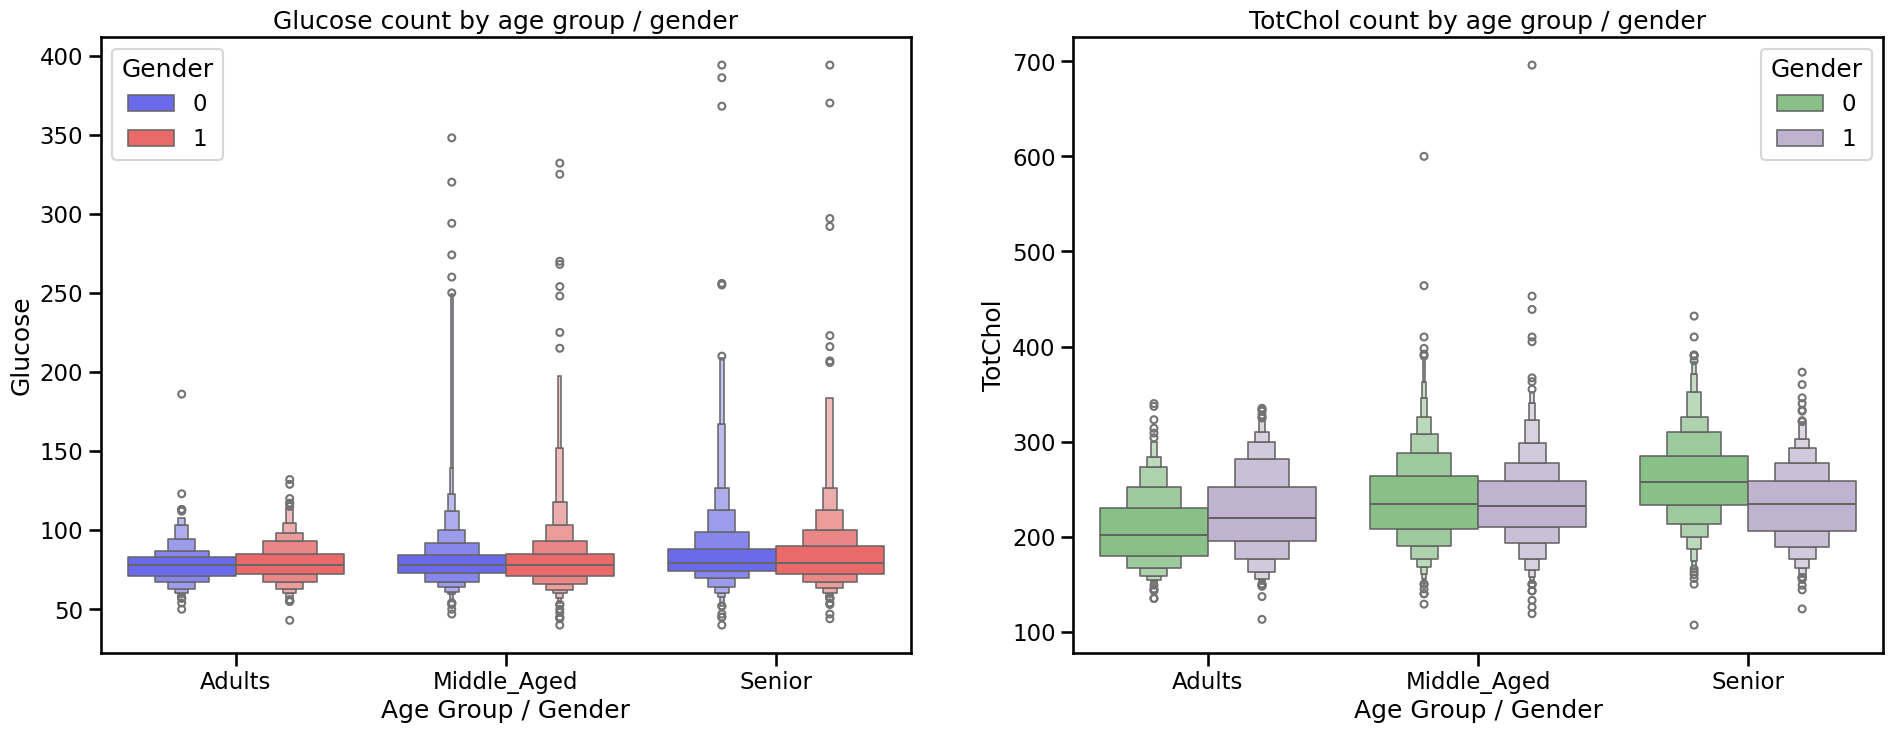

In [20]:
# multivarite analysis pt.1

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)

plt.subplot(1,2,1)
sns.boxenplot(x = 'enc_age', y = 'glucose', data = df, hue = 'male', palette = 'seismic')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks = [0,1,2], labels = ['Adults', 'Middle_Aged', 'Senior'])
plt.title('Glucose count by age group / gender')
plt.legend(title = 'Gender')


plt.subplot(1,2,2)
sns.boxenplot(x = 'enc_age', y = 'totChol', data = df, hue = 'male', palette = 'Accent')
plt.xlabel('Age Group / Gender')
plt.ylabel('TotChol')
plt.xticks(ticks = [0,1,2], labels = ['Adults', 'Middle_Aged', 'Senior'])
plt.title('TotChol count by age group / gender')
plt.legend(title = 'Gender')

C:\Users\jagan\AppData\Local\Temp\ipykernel_34624\723527282.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'enc_age', y = 'cigsPerDay', data = df, kind = 'violin', height = 7, palette = 'Greys_r')


Text(0.5, 1.0, 'Cigs per day age group')

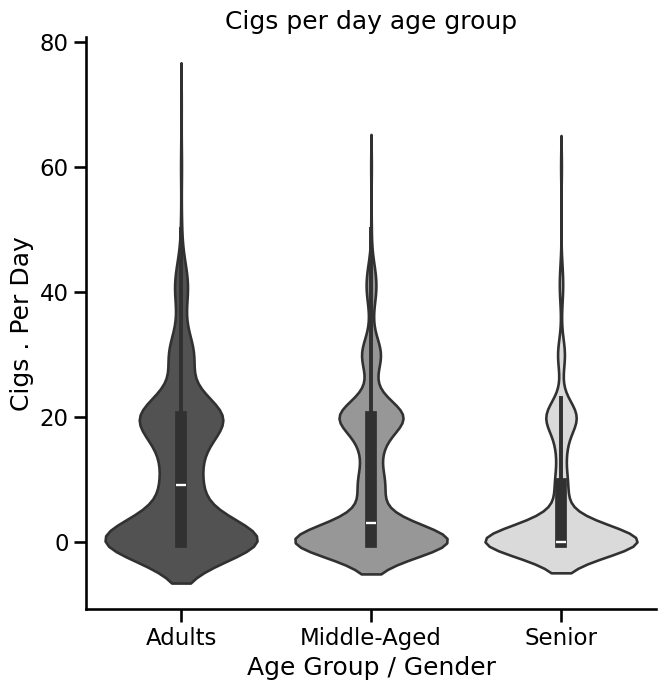

In [21]:
# violin plot of CigsPerDay by age group

sns.catplot(x = 'enc_age', y = 'cigsPerDay', data = df, kind = 'violin', height = 7, palette = 'Greys_r')
plt.xlabel('Age Group / Gender')
plt.ylabel('Cigs . Per Day')
plt.xticks(ticks = [0,1,2], labels = ['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs per day age group')

Text(0.5, 1.0, 'Diabetes age of group')

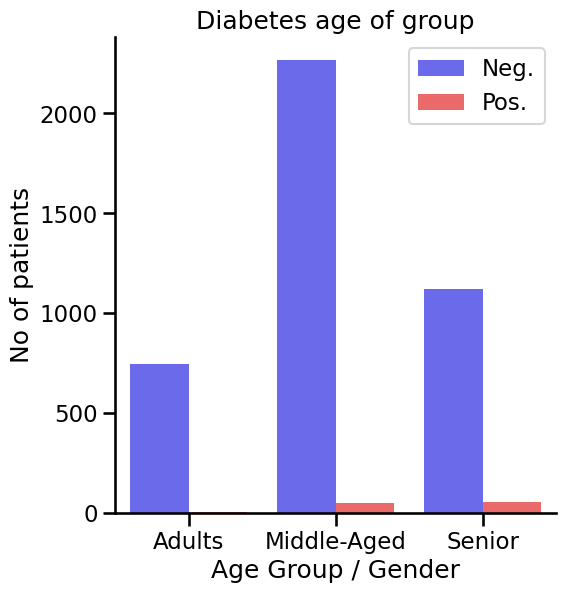

In [22]:
# diabates by age group
sns.catplot(data = df, x = 'enc_age', hue = 'diabetes', kind = 'count', height = 6, palette = 'seismic', legend = False)
plt.xlabel('Age Group / Gender')
plt.ylabel('No of patients')
plt.xticks(ticks = [0,1,2], labels = ['Adults', 'Middle-Aged', 'Senior'])
plt.legend(['Neg.', 'Pos.'])
plt.title('Diabetes age of group')


Text(0.5, 1.0, 'Target Class Count')

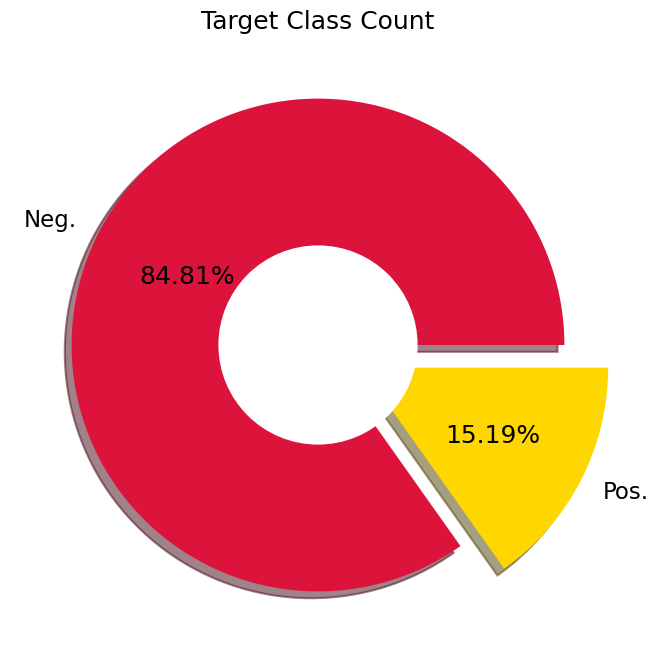

In [23]:
# target class count

plt.figure(figsize = (8,8))
plt.pie(df['TenYearCHD'].value_counts(), labels=(['Neg.', 'Pos.']), autopct = "%1.2f%%", explode = [0,0.2], 
shadow = True, colors = ['crimson','gold'])
my_circle = plt.Circle((0,0), 0.4, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

In [24]:
# making the copy of the dataset

df_copy = df.copy()

In [25]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,enc_hr,enc_age
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,1
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,2
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,1


In [26]:
# log transform the continous variables
# continous varible means measurement of somethig. its not related to order wise

df_copy['log_cigsPerDay'] = np.log1p(df_copy['cigsPerDay'])
df_copy['log_totChol'] = np.log1p(df_copy['totChol'])
df_copy['log_sysBP'] = np.log1p(df_copy['sysBP'])
df_copy['log_diaBP'] = np.log1p(df_copy['diaBP'])
df_copy['log_BMI'] = np.log1p(df_copy['BMI'])
df_copy['log_heartRate'] = np.log1p(df_copy['heartRate'])
df_copy['log_glucose'] = np.log1p(df_copy['glucose'])
df_copy['log_age'] = np.log1p(df_copy['age'])

df_copy.drop(['cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'age'], 
             axis=1, inplace = True)


In [27]:
# normalizing the dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

cols = df_copy.drop('TenYearCHD' ,axis=1).columns

norm_df = sc.fit_transform(df_copy.drop(['TenYearCHD'], axis=1))
norm_df = pd.DataFrame(data = norm_df, columns = cols,index = df_copy.drop(['TenYearCHD'], axis=1).index )
norm_df.head()

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,enc_hr,enc_age,log_cigsPerDay,log_totChol,log_sysBP,log_diaBP,log_BMI,log_heartRate,log_glucose,log_age
0,1.153113,2.006069,-0.988276,-0.173569,-0.077014,-0.671241,-0.162437,0.224455,-1.653005,-0.928462,-0.958976,-1.326982,-1.130247,0.366175,0.417050,-0.179487,-1.296260
1,-0.867217,0.019908,-0.988276,-0.173569,-0.077014,-0.671241,-0.162437,0.224455,-0.150273,-0.928462,0.389489,-0.488215,-0.094351,0.781994,1.522102,-0.246230,-0.347297
2,1.153113,-0.973172,1.011863,-0.173569,-0.077014,-0.671241,-0.162437,0.224455,-0.150273,1.143043,0.279789,-0.156346,-0.182594,-0.042965,0.002631,-0.665854,-0.102079
3,-0.867217,1.012988,1.011863,-0.173569,-0.077014,1.489778,-0.162437,0.224455,1.352458,1.408036,-0.182514,0.875238,1.039278,0.747528,-0.914968,1.308555,1.282600
4,-0.867217,1.012988,1.011863,-0.173569,-0.077014,-0.671241,-0.162437,0.224455,-0.150273,1.233898,1.101174,-0.033155,0.164064,-0.648574,0.806637,0.325550,-0.347297


### Build the model

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc


In [29]:
# splitting the dataset into train set and test set
X = norm_df
y = df_copy['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [30]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3392, 17) (3392,)
(848, 17) (848,)


### Logistic Regression

In [31]:
# before going to complex algorithms, logistic regression algo is a best approach to check how model are working.
# this is best approach when we want to know instant results.
# we will choose solver is 'liblinear' out dataset its not big.


In [32]:
from sklearn.linear_model import LogisticRegression

# train the model with logistic regression
regression = LogisticRegression(solver = 'liblinear')
regression.fit(X_train, y_train)

# predict the model accuracy
y_pred = regression.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
type(X)

pandas.core.frame.DataFrame

Accuracy score : 85.84905660377359
Cross validation score : 85.2889248026553
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.62      0.07      0.12       123

    accuracy                           0.86       848
   macro avg       0.74      0.53      0.52       848
weighted avg       0.83      0.86      0.81       848



<Axes: >

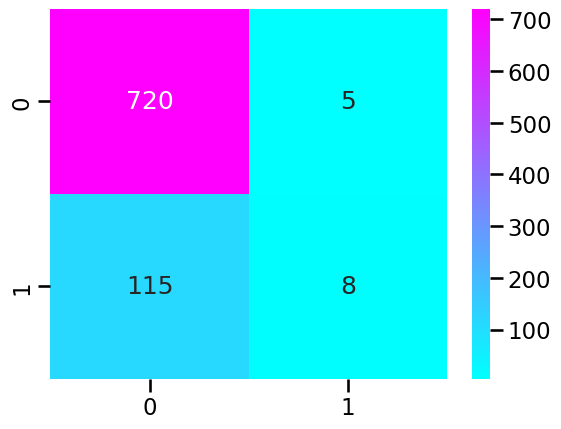

In [34]:
# metrics evaluation

print(f'Accuracy score : {accuracy_score(y_test, y_pred) * 100}')
print(f"Cross validation score : {cross_val_score(regression,X_train, y_train, cv=5).mean() * 100}")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'cool', fmt = 'd')

### Let us add class weight parameter to out logistic regression estimator and see it make any diffrence

In [35]:
# the train the model with logistic regression 
regression_cw = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
regression_cw.fit(X_train, y_train)

# predict the accuracy of the model
y_pred_cw = regression_cw.predict(X_test)
y_pred_cw

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

Accuracy score : 0.6580188679245284
Cross Validation Score : 0.6627358470073551
              precision    recall  f1-score   support

           0       0.91      0.66      0.77       725
           1       0.24      0.63      0.35       123

    accuracy                           0.66       848
   macro avg       0.58      0.65      0.56       848
weighted avg       0.82      0.66      0.71       848



<Axes: >

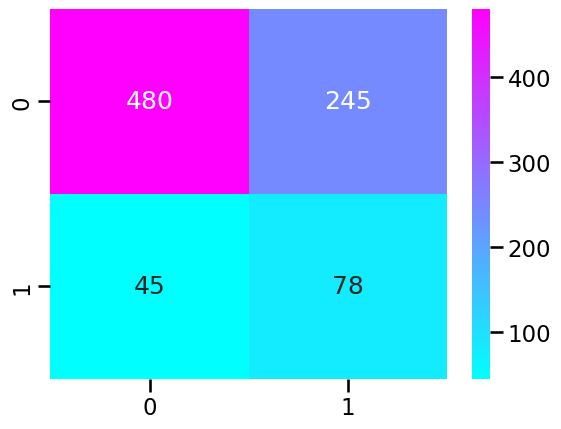

In [36]:
# Metrics evaluation

print(f"Accuracy score : {accuracy_score(y_test, y_pred_cw)}")
print(f"Cross Validation Score : {cross_val_score(estimator = regression_cw, X = X_train, y = y_train, cv=5).mean()}")
print(classification_report(y_test, y_pred_cw))

sns.heatmap(confusion_matrix(y_test, y_pred_cw), annot =True,cmap = 'cool' ,fmt = 'd')

### Over sampling using SMOTE

#### - SMOTE created synthetic observations based upon on existing minority observations.
#### - SMOTE widely used in data science practioners

In [37]:
# Applying SMOTE 

from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE

smote = SMOTE(sampling_strategy = 'not majority')
X_s_res, y_s_res = smote.fit_resample(X_train, y_train)

print(y_train.value_counts(), '\n')
np.bincount(y_s_res)

TenYearCHD
0    2871
1     521
Name: count, dtype: int64 



array([2871, 2871], dtype=int64)

In [38]:
# above we have used imblearn's SMOTE which is easiest implement
# we are using sampling strategy as 'not majority', its a similar to minority class
# post application we can validate that SMOTE was successfully and we have 2871 examples in each class

### Logistic Regression with post oversampling

In [39]:
# lets implement logistic regression again and interpret results

regression_est = LogisticRegression(solver = 'liblinear', max_iter =1000, C=1)
regression_est.fit(X_s_res, y_s_res)

y_pred_est = regression_est.predict(X_test)
y_pred_est

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,

Accuracy score : 0.660377358490566
Cross validation score : 0.6739844979576242
              precision    recall  f1-score   support

           0       0.91      0.66      0.77       725
           1       0.24      0.63      0.35       123

    accuracy                           0.66       848
   macro avg       0.58      0.65      0.56       848
weighted avg       0.82      0.66      0.71       848



<Axes: >

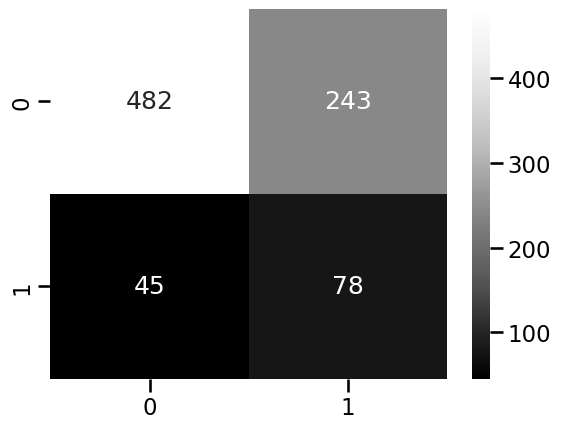

In [40]:
# metrics evalution

print(f"Accuracy score : {accuracy_score(y_test, y_pred_est)}")
print(f"Cross validation score : {cross_val_score(estimator = regression_est, X = X_s_res, y=  y_s_res, cv=5).mean()}")
print(classification_report(y_test, y_pred_est))

sns.heatmap(confusion_matrix(y_test, y_pred_est), annot = True, fmt = 'd', cmap = 'Greys_r')

### ROC-AUC (Receiver Operator Characterstics - Area Under Curve)

- its a performance measurement for classification problem
- ROC is probability curve and AUC represents degree or measures of separability
- it tells us how much model is capable of distinguishing between classes, higher AUC, the better model is predicting 0s are 0s and 1s are 1s
- higher AUC, better distinguish between patients with disease and without diseases.
- ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis

Text(0.5, 1.0, 'Receiver Opeartor Characterstics  - Area Under Curve (ROC-AUC)')

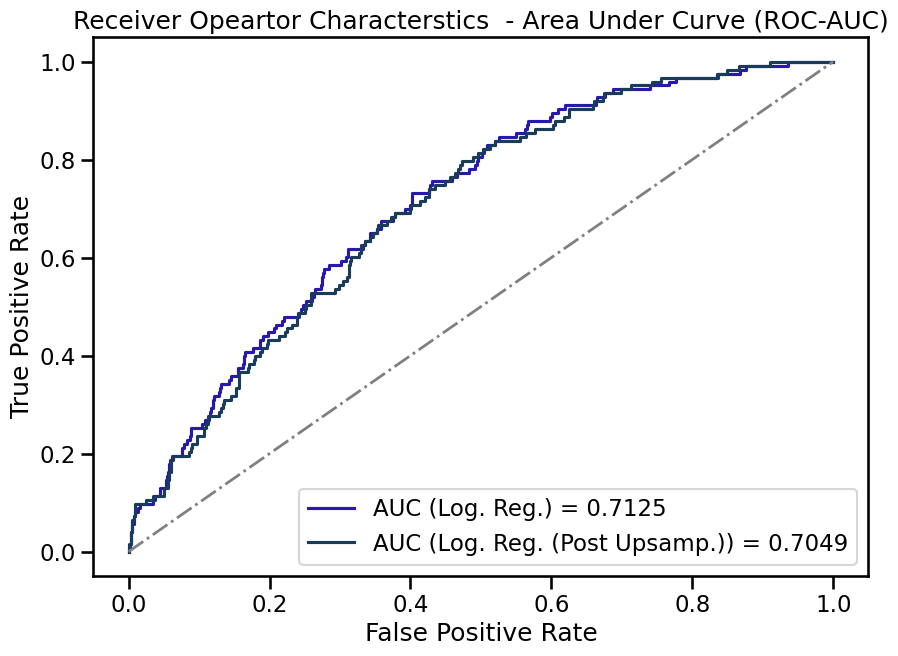

In [44]:
# ROC_AUC

from sklearn.metrics import auc, roc_auc_score, roc_curve

regression_proba_cw = regression_cw.predict_proba(X_test)
regression_proba_est = regression_est.predict_proba(X_test)

fpr_cw, tpr_cw, _ = roc_curve(y_test, regression_proba_cw[:,1])
fpr_est, tpr_est, _ = roc_curve(y_test, regression_proba_est[:,1])

roc_auc_cw = auc(fpr_cw, tpr_cw)
roc_auc_est = auc(fpr_est, tpr_est)


plt.figure(figsize=(10,7))

plt.plot(fpr_cw, tpr_cw, color = (np.random.rand(), np.random.rand(), np.random.rand()), 
         label='AUC (Log. Reg.) = %0.4f'% roc_auc_cw)
plt.plot(fpr_est, tpr_est, color = (np.random.rand(), np.random.rand(), np.random.rand()),
        label='AUC (Log. Reg. (Post Upsamp.)) = %0.4f'% roc_auc_est)

plt.plot([0,1], 'grey', lw=2, linestyle = '-.')
plt.legend(loc = 'lower right')
plt.ylabel("True Positive Rate")
plt.xlabel('False Positive Rate')
plt.title('Receiver Opeartor Characterstics  - Area Under Curve (ROC-AUC)')

### Conclusions:

#### - we figured out how our dataset is suffering from class imbalance and & we handled imbalanced dataset with help of SMOTE
#### - from busineed perspective, it can help docters can take necessary measures for patients carrying high risk for heart disease
#### - this can also benifit of Insurance companies to some extent, if they taken effective number measurements then number of claims can be reduced.